### 2.4 텐서플로우2 코드 맛보기

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')


데이터를 불러온다

In [2]:
cols= ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('./data/car_evaluation.csv', names=cols, header=None)
# csv파일에는 헤더가 포함되어 있지 않으므로 header를 None으로 지정함

In [3]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


데이터 분포를 파이 차트를 이용해서 살펴본다.

'unacc : 허용 불가능 | acc : 허용 | good : 구웃 | vgood : 베리구웃'

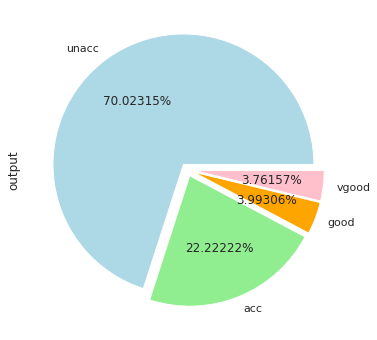

In [4]:
plot_size = plt.rcParams['figure.figsize'] #?
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))
'''unacc : 허용 불가능 | acc : 허용 | good : 구웃 | vgood : 베리구웃'''

\t원핫 인코딩을 한다.
딥러닝은 통계 알고리즘을 기반으로 하기 때문에 범주 정보를 숫자로 변환해야한다. (numpy였었네)

In [5]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')
doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons') # 오타 아닙니다...
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

print('데이터 타입 비교')
print('price > ')
print(f'\t원핫 인코딩 전 : {cars.price[0]} ...... {type(cars.price[0])}')
print(f'\t원핫 인코딩 후 : {price.loc[0][0]} ...... {type(price.loc[0][0])}')
# 모두 같아서 생략함
# print(price.head(), '\n')


데이터 타입 비교
price > 
	원핫 인코딩 전 : vhigh ...... <class 'str'>
	원핫 인코딩 후 : 0 ...... <class 'numpy.uint8'>


labels를 생성한다. 위와 다르게 output, 즉 y값을 정리하자

In [6]:
labels = pd.get_dummies(cars.output, prefix='condition')
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


X를 먼저 정의하자.

In [7]:
X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
X.head()
# 결과적으로는 price끼리는 상호배타적으로 분배가 되어 있긴하지만 정말로 이대로 들어가는지는 의문이다.

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


그리고 y를 정의한다.

In [8]:
print(f'labels type > {type(labels)}')
print(f'labels.values type > {type(labels.values)}')
y = labels.values # 이 스페이스는 numpy를 가지고 있는 부분이다. 정의하면서 변환되는 듯한 느낌을 줄뿐 실제로는 함수가 아니다.


labels type > <class 'pandas.core.frame.DataFrame'>
labels.values type > <class 'numpy.ndarray'>


사이킷런으로 데이터셋을 훈련과 테스트로 나눈다.

In [9]:
from sklearn.model_selection import train_test_split # split_folder와 같은 역할을 할 것 같다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# return을 봐도 잘 모르겠으니 ... 외워야한다.
# X, y 처럼 꼭 두개가 아니어도 된다. 딱 하나이어도 되며 return뒤가 지저분했던 이유도 이 때문일 것이다.
# random_state는 seed인가

In [10]:
print(f'X_train type > {type(X_train)}')

X_train type > <class 'pandas.core.frame.DataFrame'>


모델을 생성한다.

In [11]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout # 다 아는 친구들이구만\
from tensorflow.keras.models import Model

print(f'X.shape > {X.shape}')
input_layer = Input(shape=(X.shape[1])) # cols에 맞춰야하므로 [1]!
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)
# 활성화 함수(activation)를 살펴보자

model = Model(input_layer, output)

X.shape > (1728, 21)


2022-09-14 21:40:18.507743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 21:40:18.547838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 21:40:18.548017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 21:40:18.548844: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

컴파일과 서머리

In [12]:
# model.compile(loss='categorical_crossentrㅐy', optimizer='adam', metrics=['accuacy']) # 오타나도 만들어진다...
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 15)                330       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


fit!

In [13]:
# 만약 메모리 에러가 난다면... nvidia-smi로 pid를 찾아 kill 할 것

In [14]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

history = model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1, validation_batch_size=0.2)
# validation_batch_size로 또 valid 데이터를 나누었네
# batch는 모델 가중치를 한 번 업데이트 시킬때 사용되는 데이터의 묶음 
# 예를 들어 1000개의 데이터를 20배치로 하면 20개마다 모델 가중치를 업데이트 하므로 50번 나눠서 1에포크를 진행

Epoch 1/50
87/87 [==============================] - 1s 2ms/step - loss: 1.1993 - accuracy: 0.5485
Epoch 2/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.7098
Epoch 3/50
87/87 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7337
Epoch 4/50
87/87 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7612
Epoch 5/50
87/87 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8068
Epoch 6/50
87/87 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8459
Epoch 7/50
87/87 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8654
Epoch 8/50
87/87 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8770
Epoch 9/50
87/87 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.8987
Epoch 10/50
87/87 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9153
Epoch 11/50
87/87 [

테스트 셋으로 검사


In [18]:
print('eval...')
score = model.evaluate(X_test, y_test, verbose=1)
print('eval... without y')
_ = model.evaluate(X_test, verbose=1) # 당연히 X만 넣어도 되긴하다. 하지만 점수만 없을 뿐

eval...
11/11 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9827
eval... without y
11/11 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


구분할 줄 알아야함 > True Positive, True Negative, False Posiive, False Negative

In [21]:
import matplotlib.image as image

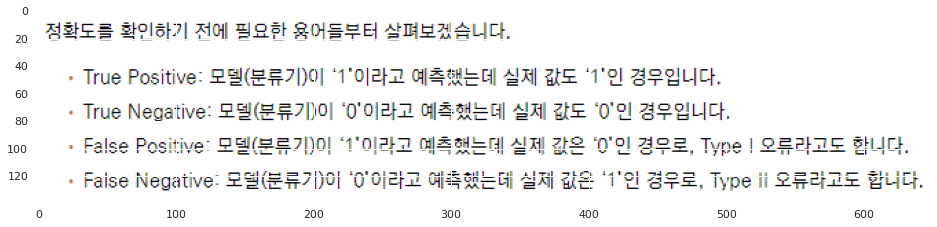

In [28]:
img1 = image.imread('./nb_img/tfps_1.png')
plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(img1)
plt.show()

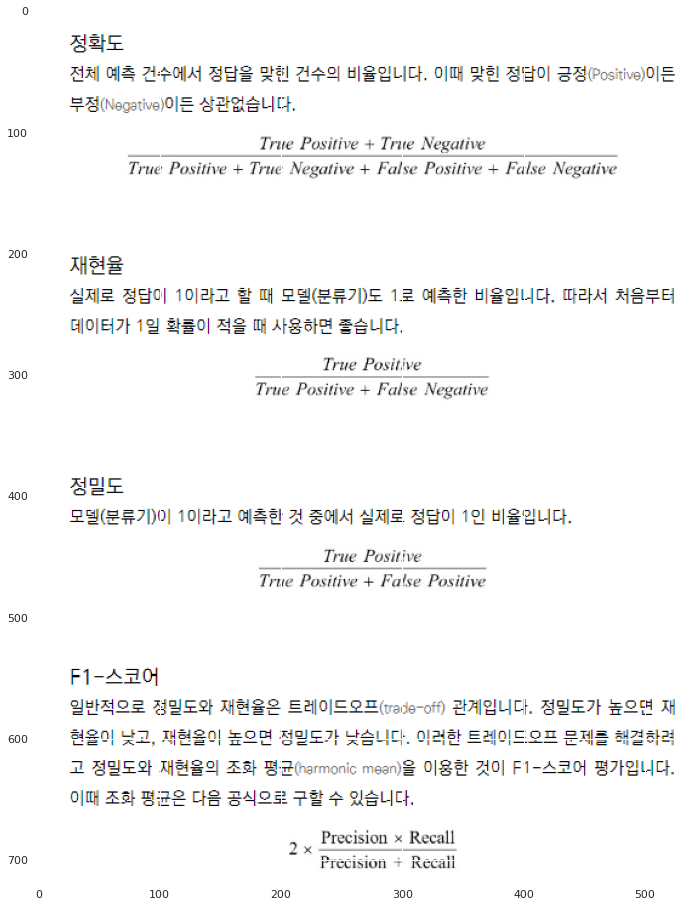

In [29]:
img2 = image.imread('./nb_img/tfps_2.png')
plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(img2)
plt.show()
